In [1]:
import gpx_parser as parser
import gmplot
import gpxpy
from pandas import DataFrame
import mplleaflet
import matplotlib.pyplot as plt
from geopy.distance import vincenty
from random import randint


colors = []

for i in range(101):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [2]:

def distance(gpx):
    totalDistance = 0
    track = gpx.tracks[0]
    segment = track.segments[0]
    f = 1
    prev = 0
    for point_idx, point in enumerate(segment.points):
        if(f):
            prev = (point.latitude,point.longitude)
            f = 0
        else:
            curr = (point.latitude,point.longitude)
            totalDistance += vincenty(curr, prev).miles
            prev = curr
#         print(point.time,point.longitude,point.latitude)
    return totalDistance

In [3]:

fig = plt.figure(figsize=(10, 10))

avg = 0
dis = []

no_athlete = 8
avg_list = []
athlete_gpx_len = [0, 651, 844, 512, 432, 491, 448, 1496]

athlete_files = "Athlete"

for j in range(1, no_athlete):
    for i in range(1, athlete_gpx_len[j]):
        gpx = gpxpy.parse(open('Sport2/Athlete' + str(j) + '/' + str(i) + '.gpx'))
        dis.append(distance(gpx))
        
    avg_dist = sum(dis)/len(dis)
    avg_list.append(avg_dist)
    print('Avg. distance travelled:',avg_dist)
        

print('Avg. distance travelled:',sum(dis)/len(dis))


print("Elements in the distance array: ")
for i in range(len(avg_list)):
    
    print(avg_list[i])
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  del sys.path[0]


Avg. distance travelled: 15.53989707374474
Avg. distance travelled: 20.010519889798218
Avg. distance travelled: 20.03765131639104
Avg. distance travelled: 20.50226798341057
Avg. distance travelled: 21.29522834108468
Avg. distance travelled: 20.86569383925918
Avg. distance travelled: 21.44846088867563
Avg. distance travelled: 21.44846088867563
Elements in the distance array: 
15.53989707374474
20.010519889798218
20.03765131639104
20.50226798341057
21.29522834108468
20.86569383925918
21.44846088867563


<Figure size 720x720 with 0 Axes>

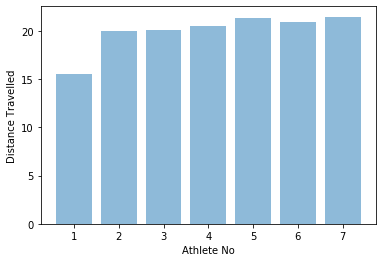

In [4]:
x_label = [1, 2, 3, 4, 5, 6, 7]

plt.bar(x_label,avg_list , align="center", alpha=0.5)

plt.xlabel("Athlete No")
plt.ylabel("Distance Travelled")

plt.show()

In [5]:
total_avg = sum(avg_list)/len(avg_list)

print(total_avg)

19.957102761766293
